# Basic Example

This short notebook shows how to get started with HiggsDNA and [Coffea](https://github.com/CoffeaTeam/coffea).

In [1]:
import awkward as ak
import numpy as np
import hist
import json
from importlib import resources
import matplotlib.pyplot as plt

In [69]:
columns_MC = ['mass', 'tag_eta', 'tag_electronVeto', 'probe_electronVeto', 'n_jets', 'tag_r9', 'probe_fixedGridRhoAll', 'probe_phi', 'probe_r9', 'tag_isScEtaEB', 'probe_isScEtaEB', 'weight', 'tag_mvaID', 'tag_isScEtaEE', 'tag_energy', 'tag_pt', 'tag_weight', 'probe_eta', 'probe_mvaID', 'probe_isScEtaEE', 'probe_ScEta', 'probe_pt', 'LeadPhoton_pt_mgg', 'LeadPhoton_mvaID', 'SubleadPhoton_mvaID',  'pt', 'SubleadPhoton_pt_mgg', 'LeadPhoton_eta', 'SubleadPhoton_eta', 'ggh_vs_hb_bdt_sig_score', 'ggh_vs_hb_bdt_tth_score', 'ggh_vs_hb_bdt_vbf_score', 'ggh_vs_hb_bdt_vh_score',  "tag_etaWidth", "tag_pfChargedIsoPFPV", "tag_pfChargedIsoWorstVtx", "tag_pfPhoIso03", "tag_pfRelIso03_all", "tag_pfRelIso03_chg", "tag_phi", "tag_phiWidth", "tag_r9", "tag_s4", "tag_sieie", "tag_sieip", "probe_etaWidth", "probe_pfChargedIsoPFPV", "probe_pfChargedIsoWorstVtx", "probe_pfPhoIso03", "probe_pfRelIso03_all", "probe_pfRelIso03_chg", "probe_phi", "probe_phiWidth", "probe_r9", "probe_s4", "probe_sieie", "probe_sieip"]

columns_data = ['mass', 'pt', 'tag_eta', 'tag_electronVeto', 'tag_isScEtaEB', 'tag_r9', 'probe_fixedGridRhoAll', 'probe_phi',  'probe_r9', 'probe_electronVeto', 'probe_isScEtaEB', 'tag_mvaID', 'tag_isScEtaEE', 'tag_pt', 'probe_eta', 'probe_mvaID', 'probe_isScEtaEE', 'probe_pt', 'LeadPhoton_pt_mgg', 'LeadPhoton_mvaID', 'SubleadPhoton_mvaID', 'SubleadPhoton_pt_mgg', 'Diphoton_cos_dPhi', 'LeadPhoton_eta', 'SubleadPhoton_eta', 'ggh_vs_hb_bdt_sig_score', 'ggh_vs_hb_bdt_tth_score', 'ggh_vs_hb_bdt_vbf_score', 'ggh_vs_hb_bdt_vh_score', "tag_etaWidth", "tag_pfChargedIsoPFPV", "tag_pfChargedIsoWorstVtx", "tag_pfPhoIso03", "tag_pfRelIso03_all", "tag_pfRelIso03_chg", "tag_phi", "tag_phiWidth", "tag_r9", "tag_s4", "tag_sieie", "tag_sieip", "probe_etaWidth", "probe_pfChargedIsoPFPV", "probe_pfChargedIsoWorstVtx", "probe_pfPhoIso03", "probe_pfRelIso03_all", "probe_pfRelIso03_chg", "probe_phi", "probe_phiWidth", "probe_r9", "probe_s4", "probe_sieie", "probe_sieip"]

In [70]:
fileset = {
    "CQR": ak.from_parquet("/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/master_240821/higgs-dna-tiziano-bevilacqua/output/TnP_HpC_DY_pt1_2017/DYJetsToLL_M-50_2017/nominal/", columns=columns_MC, lazy=True),
    "data": ak.from_parquet("/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/master_240821/higgs-dna-tiziano-bevilacqua/output/TnP_HpC_Data_2017_v11/merged/Data_2017/", columns=columns_data, lazy=True),
    "noCQR": ak.from_parquet("/pnfs/psi.ch/cms/trivcat/store/user/bevila_t/test2/phys/xpluscharm/HiggsDNA_output/HpC_TnP_2017_eVeto_expID_2/DYJetsToLL_M-50_2017/nominal/",  columns=columns_MC, lazy=True)
}

In [71]:
meta = {
    "masks": {
        "CQR": (fileset["CQR"].mass > 60) & (fileset["CQR"].mass < 120) & (~fileset["CQR"].tag_electronVeto) & (~fileset["CQR"].probe_electronVeto)  & (fileset["CQR"].tag_r9 > 0.96)  & (fileset["CQR"].probe_r9 > 0.96) & (fileset["CQR"].tag_isScEtaEB) & (fileset["CQR"].probe_isScEtaEB),
        "noCQR": (fileset["noCQR"].mass > 60) & (fileset["noCQR"].mass < 120) & (~fileset["noCQR"].tag_electronVeto) & (~fileset["noCQR"].probe_electronVeto) & (fileset["noCQR"].tag_r9 > 0.96)  & (fileset["noCQR"].probe_r9 > 0.96) & (fileset["noCQR"].tag_isScEtaEB) & (fileset["noCQR"].probe_isScEtaEB),
        "data": (fileset["data"].mass > 60) & (fileset["data"].mass < 120) & (~fileset["data"].tag_electronVeto) & (~fileset["data"].probe_electronVeto) & (fileset["data"].tag_r9 > 0.96) & (fileset["data"].probe_r9 > 0.96) & (fileset["data"].tag_isScEtaEB)  & (fileset["data"].probe_isScEtaEB) 
    },
    "norm_original": {
        "CQR": ak.sum(fileset["CQR"]["weight"]),
        "noCQR": ak.sum(fileset["noCQR"]["weight"]),
        "data": len(fileset["data"])
    },
    "norm": {}
}

In [72]:
for f in [*fileset]:
    print(f)
    fileset[f] = fileset[f][meta["masks"][f]]

CQR
data
noCQR


In [73]:
for f in fileset["CQR"].fields:
    if "weight" not in f:
        print(f)

mass
tag_eta
tag_electronVeto
probe_electronVeto
n_jets
tag_r9
probe_fixedGridRhoAll
probe_phi
probe_r9
tag_isScEtaEB
probe_isScEtaEB
tag_mvaID
tag_isScEtaEE
tag_energy
tag_pt
probe_eta
probe_mvaID
probe_isScEtaEE
probe_ScEta
probe_pt
LeadPhoton_pt_mgg
LeadPhoton_mvaID
SubleadPhoton_mvaID
pt
SubleadPhoton_pt_mgg
LeadPhoton_eta
SubleadPhoton_eta
ggh_vs_hb_bdt_sig_score
ggh_vs_hb_bdt_tth_score
ggh_vs_hb_bdt_vbf_score
ggh_vs_hb_bdt_vh_score
tag_etaWidth
tag_pfChargedIsoPFPV
tag_pfChargedIsoWorstVtx
tag_pfPhoIso03
tag_pfRelIso03_all
tag_pfRelIso03_chg
tag_phi
tag_phiWidth
tag_r9
tag_s4
tag_sieie
tag_sieip
probe_etaWidth
probe_pfChargedIsoPFPV
probe_pfChargedIsoWorstVtx
probe_pfPhoIso03
probe_pfRelIso03_all
probe_pfRelIso03_chg
probe_phi
probe_phiWidth
probe_r9
probe_s4
probe_sieie
probe_sieip


In [74]:
for f in [*fileset]:
    if hasattr(fileset[f], "weight"):
        meta["norm"][f] = ak.sum(fileset[f]["weight"]),
        fileset[f]["weight_norm"] = fileset[f]["weight"] / meta["norm"][f]
    else:

        meta["norm"][f] = len(fileset[f]),
        if len(fileset[f]):
            fileset[f]["weight_norm"] = ak.ones_like(fileset[f]["mass"]) / meta["norm"][f]
        else:
            fileset[f]["weight_norm"] = ak.ones_like(fileset[f]["mass"])

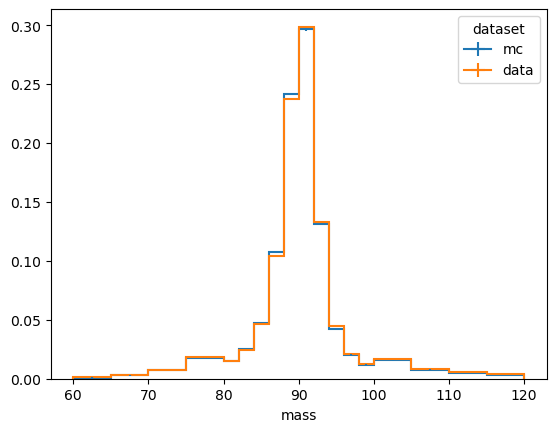

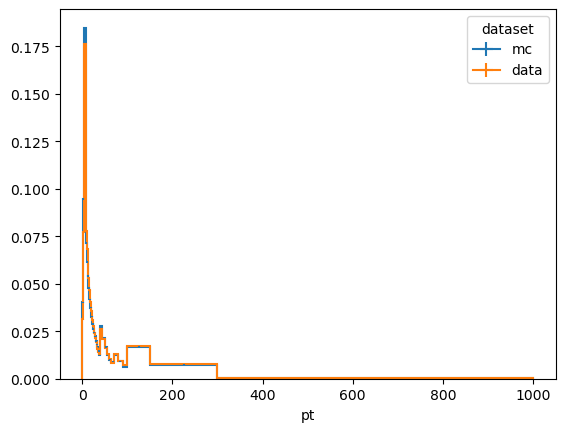

In [77]:
nbins = 60
var = "pt"
var2 = "mass"
bin_edges_pt = np.array([0, 2, 4, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 45, 50, 55, 60, 65, 70, 80, 90, 100, 150, 300, 1000]) 
bin_edges_mass = np.array([60, 65, 70, 75, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 105, 110, 115, 120])

dists = (
    hist.Hist.new
    .StrCat(["mc", "data"], name="dataset", growth=True)
    .Var(bin_edges_pt, name="pt", label="pt")
    .Var(bin_edges_mass, name="mass", label="mass")
    .Weight()
    .fill(
        dataset="mc",
        pt=fileset["CQR"][var],
        mass=fileset["CQR"][var2],
        weight=fileset["CQR"].weight_norm
    )
    .fill(
        dataset="data",
        pt=fileset["data"][var],
        mass=fileset["data"][var2],
        weight=fileset["data"].weight_norm
    )
)

mc_mass = dists["mc", :, :].project("mass")
data_mass = dists["data", :, :].project("mass")
mc_pt = dists["mc", :, :].project("pt")
data_pt = dists["data", :, :].project("pt")

fig, ax = plt.subplots()
mc_mass.plot1d(ax=ax, label="mc")
data_mass.plot1d(ax=ax, label="data")
ax.legend(title="dataset")

fig, ax = plt.subplots()
mc_pt.plot1d(ax=ax, label="mc")
data_pt.plot1d(ax=ax, label="data")
ax.legend(title="dataset")


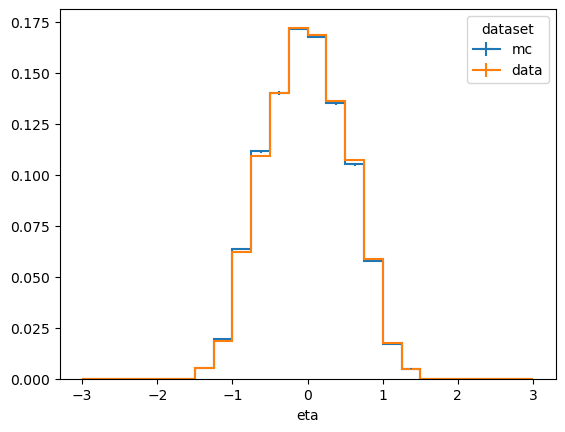

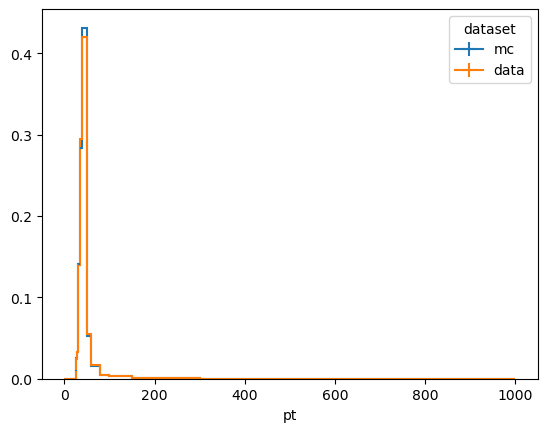

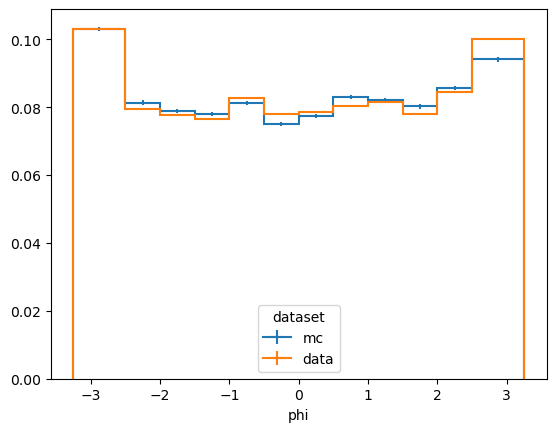

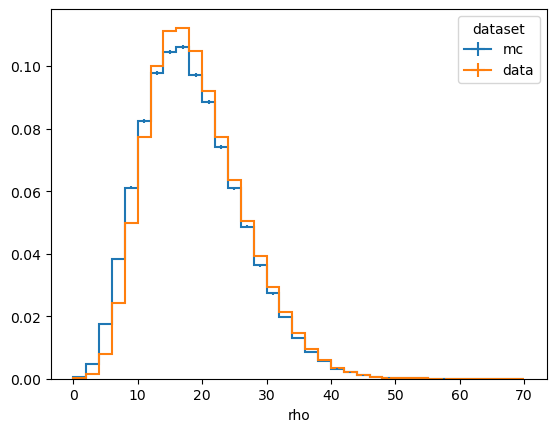

In [76]:
nbins = 60
var = "probe_pt"
var2 = "probe_eta"
var3 = "probe_phi"
var4 = "probe_fixedGridRhoAll"
bin_edges_pt = np.array([0, 25, 26, 28, 30, 35, 40, 50, 60, 80, 100, 150, 300, 1000]) 
bin_edges_eta = np.array([-3, -2, -1.5, -1.25, -1, -0.75, -0.5, -0.25, 0., 0.25, 0.5, 0.75, 1., 1.25, 1.5, 1.75, 2., 3.])
bin_edges_phi = np.array([-3.25, -2.5, -2, -1.5, -1, -0.5,  0., 0.5, 1., 1.5, 2., 2.5, 3.25])
bin_edges_rho = np.array([0., 2, 4,  6., 8, 10., 12, 14., 16, 18,  20., 22, 24, 26., 28,  30., 32, 34., 36, 38, 40., 42, 44., 46, 48, 50., 55., 60., 70])

dists = (
    hist.Hist.new
    .StrCat(["mc", "data"], name="dataset", growth=True)
    .Var(bin_edges_pt, name="pt", label="pt")
    .Var(bin_edges_eta, name="eta", label="eta")
    .Var(bin_edges_phi, name="phi", label="phi")
    .Var(bin_edges_rho, name="rho", label="rho")
    .Weight()
    .fill(
        dataset="mc",
        pt=fileset["CQR"][var],
        eta=fileset["CQR"][var2],
        phi=fileset["CQR"][var3],
        rho=fileset["CQR"][var4],
        weight=fileset["CQR"].weight_norm
    )
    .fill(
        dataset="data",
        pt=fileset["data"][var],
        eta=fileset["data"][var2],
        phi=fileset["data"][var3],
        rho=fileset["data"][var4],
        weight=fileset["data"].weight_norm
    )
)

mc_eta = dists["mc", :, :, :, :].project("eta")
data_eta = dists["data", :, :, :, :].project("eta")
mc_pt = dists["mc", :, :, :, :].project("pt")
data_pt = dists["data", :, :, :, :].project("pt")
mc_phi = dists["mc", :, :, :, :].project("phi")
data_phi = dists["data", :, :, :, :].project("phi")
mc_rho = dists["mc", :, :, :, :].project("rho")
data_rho = dists["data", :, :, :, :].project("rho")

fig, ax = plt.subplots()
mc_eta.plot1d(ax=ax, label="mc")
data_eta.plot1d(ax=ax, label="data")
ax.legend(title="dataset")

fig, ax = plt.subplots()
mc_pt.plot1d(ax=ax, label="mc")
data_pt.plot1d(ax=ax, label="data")
ax.legend(title="dataset")

fig, ax = plt.subplots()
mc_phi.plot1d(ax=ax, label="mc")
data_phi.plot1d(ax=ax, label="data")
ax.legend(title="dataset")

fig, ax = plt.subplots()
mc_rho.plot1d(ax=ax, label="mc")
data_rho.plot1d(ax=ax, label="data")
ax.legend(title="dataset")

In [48]:
num

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 

In [49]:
num > 0

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False,  True, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False,  True,  True, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

/tmp/ipykernel_15265/2619506984.py:5: RuntimeWarning: divide by zero encountered in divide
  num / den,
/tmp/ipykernel_15265/2619506984.py:5: RuntimeWarning: invalid value encountered in divide
  num / den,


ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f1448dd1030>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f1449ecabc0>, text=[])

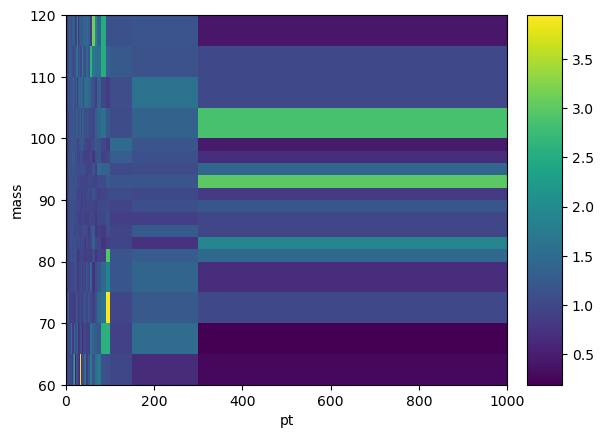

In [81]:
den = dists["mc", :, :].values()
num = dists["data", :, :].values()
sf_abs = np.where(
    (num > 0) & (den > 0),
    num / den,
    1.0,
)


# a quick way to plot the scale factor is to steal the axis definitions from the
#  input histograms:
sfhist_abs = hist.Hist(*dists.axes[1:], data=sf_abs)

# Access the histogram data and edges
values = sfhist_abs.values()
edges = sfhist_abs.axes[0].edges

sfhist_abs.project("pt", "mass").plot2d()
#sfhist_abs.project("rho").plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f13a6e98fa0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

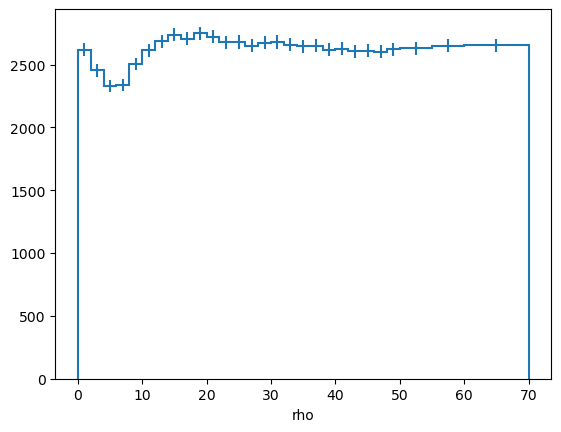

In [52]:
sfhist_abs.project("rho").plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f14491a43a0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

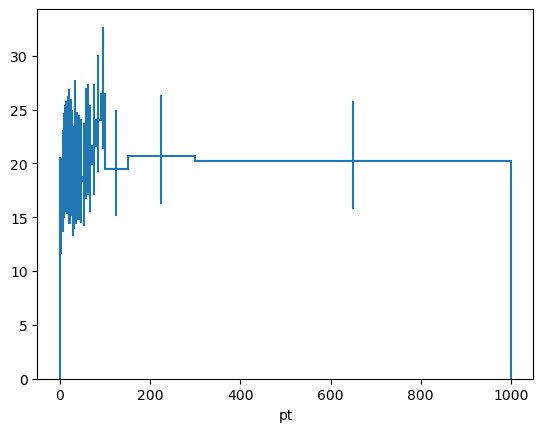

In [82]:
sfhist_abs.project("pt").plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f13a6da5c00>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

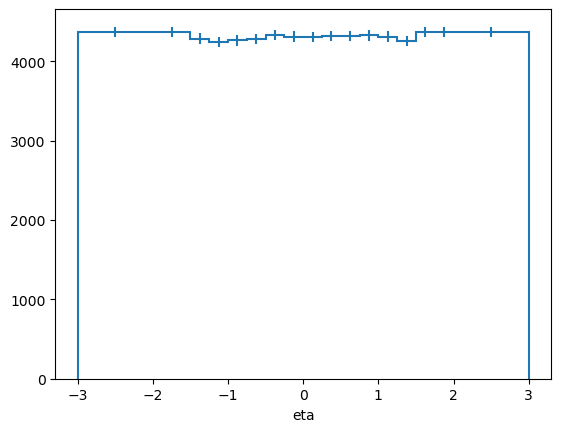

In [54]:
sfhist_abs.project("eta").plot1d()

In [83]:
import correctionlib
import correctionlib.schemav2 as cs
import rich
from optparse import OptionParser

import hist
from correctionlib import convert

In [84]:
# without a name, the resulting object will fail validation
sfhist_abs.name = "Z_pt_mc_to_nominal_4D"
sfhist_abs.label = "reweighted"
mc_to_data = convert.from_histogram(sfhist_abs)
mc_to_data.description = "Reweights MC Z pt and mass to agree with data"
# set overflow bins behavior (default is to raise an error when out of bounds)
mc_to_data.data.flow = "clamp"
rich.print(mc_to_data)

📈 Z_pt_mc_to_nominal_4D (v0)
Reweights MC Z pt and mass to agree with data
Node counts: MultiBinning: 1
╭───────────── ▶ input ─────────────╮ ╭───────────── ▶ input ─────────────╮
│ pt (real)                         │ │ mass (real)                       │
│ pt                                │ │ mass                              │
│ Range: [0.0, 1000.0), overflow ok │ │ Range: [60.0, 120.0), overflow ok │
╰───────────────────────────────────╯ ╰───────────────────────────────────╯
╭──── ◀ output ─────╮
│ reweighted (real) │
│ No description    │
╰───────────────────╯

In [86]:
for f in [*fileset]:
    if hasattr(fileset[f], "weight"):
        fileset[f]["weight_norm"] = fileset[f]["weight_norm"] * mc_to_data.to_evaluator().evaluate(fileset[f]["pt"], fileset[f]["mass"])#, fileset[f]["probe_phi"], fileset[f]["probe_fixedGridRhoAll"])

In [88]:
mc_to_data.to_evaluator().evaluate(fileset[f]["pt"], fileset[f]["mass"])#fileset[f]["probe_pt"], fileset[f]["probe_eta"], fileset[f]["probe_phi"], fileset[f]["probe_fixedGridRhoAll"])

array([1.15697543, 0.81417297, 1.03082409, ..., 1.02866237, 0.98211487,
       1.00216303])

CQR green
data orange
noCQR royalblue


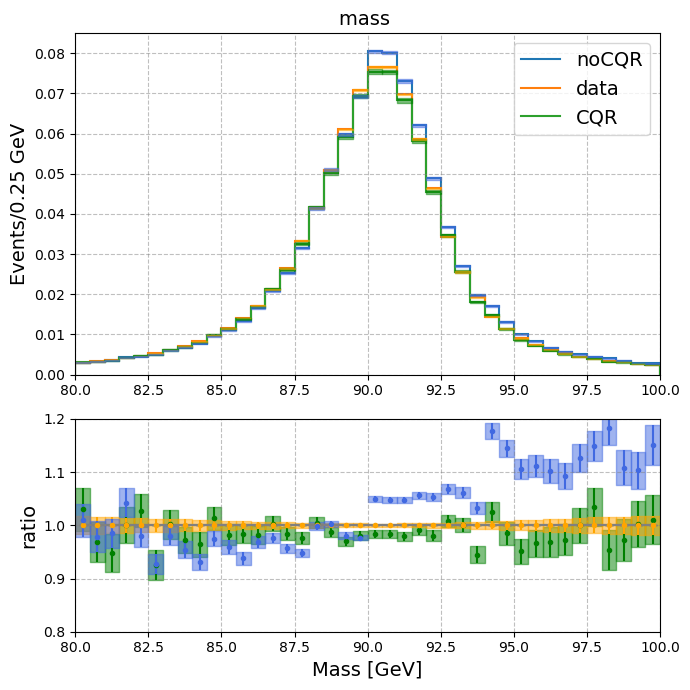

In [89]:
# Xsec variations
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=3, colspan=3)

var = "mass"
min_ = 80.
max_ = 100
nbins = 40

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(
    [
        "CQR", 
        "data",
        "noCQR",
        
    ], 
    name="c"
)
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

for sample in [*fileset]:
    full_hist.fill(ax = fileset[sample][var], weight = fileset[sample]["weight_norm"], c=sample)
    full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["weight_norm"]**2, c=sample)

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# cosmetics
ax0.set_ylabel('Events/0.25 GeV', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (3, 0), rowspan=2, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

colours = ["green", "orange", "royalblue"]
for j, sample in enumerate([*fileset]):
    print(sample,colours[j])
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

for j, sample in enumerate([*fileset]):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["data"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="data")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["data"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["data"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["data"][i], ydn[sample][i]/mc["bins"]["data"][i]], [yup[sample][i]/mc["bins"]["data"][i], yup[sample][i]/mc["bins"]["data"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="data stat unc.")


ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('Mass [GeV]', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()

plt.savefig(f"plots/CQR_{var}.pdf")

CQR green
data orange
noCQR royalblue


/tmp/ipykernel_15265/993356436.py:83: RuntimeWarning: invalid value encountered in divide
  mc["bins"][sample] / mc["bins"]["data"],
/tmp/ipykernel_15265/993356436.py:87: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["data"]), color=colours[j], marker=".", linestyle="", label=sample)
/tmp/ipykernel_15265/993356436.py:90: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["data"][i], ydn[sample][i]/mc["bins"]["data"][i]], [yup[sample][i]/mc["bins"]["data"][i], yup[sample][i]/mc["bins"]["data"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="data stat unc.")


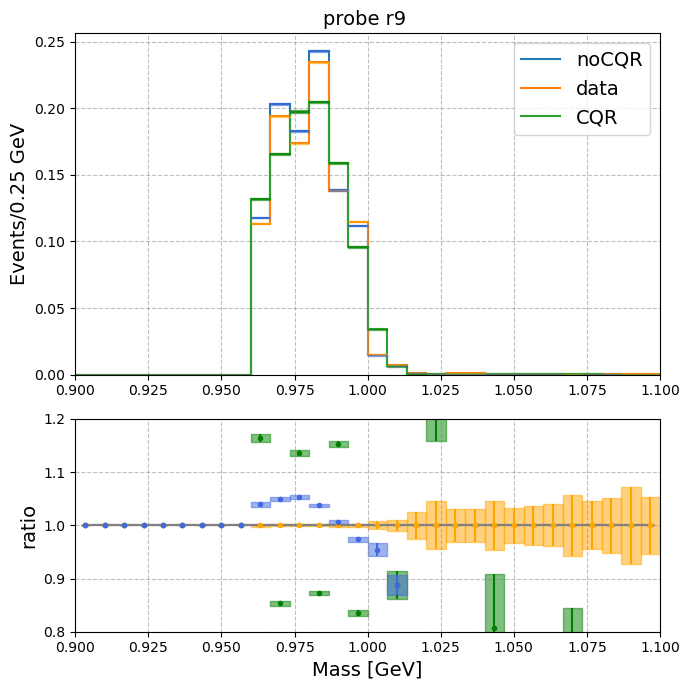

In [90]:
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=3, colspan=3)

var = "probe_r9"
min_ = 0.9
max_ = 1.1
nbins = 30

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(
    [
        "CQR", 
        "data",
        "noCQR",
        
    ], 
    name="c"
)
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

for sample in [*fileset]:
    full_hist.fill(ax = fileset[sample][var], weight = fileset[sample]["weight_norm"], c=sample)
    full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["weight_norm"]**2, c=sample)

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# cosmetics
ax0.set_ylabel('Events/0.25 GeV', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (3, 0), rowspan=2, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

colours = ["green", "orange", "royalblue"]
for j, sample in enumerate([*fileset]):
    print(sample,colours[j])
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

for j, sample in enumerate([*fileset]):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["data"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="data")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["data"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["data"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["data"][i], ydn[sample][i]/mc["bins"]["data"][i]], [yup[sample][i]/mc["bins"]["data"][i], yup[sample][i]/mc["bins"]["data"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="data stat unc.")


ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('Mass [GeV]', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()

plt.savefig(f"plots/CQR_{var}.pdf")

CQR green
data orange
noCQR royalblue


/tmp/ipykernel_15265/1568736344.py:83: RuntimeWarning: invalid value encountered in divide
  mc["bins"][sample] / mc["bins"]["data"],
/tmp/ipykernel_15265/1568736344.py:87: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["data"]), color=colours[j], marker=".", linestyle="", label=sample)
/tmp/ipykernel_15265/1568736344.py:90: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["data"][i], ydn[sample][i]/mc["bins"]["data"][i]], [yup[sample][i]/mc["bins"]["data"][i], yup[sample][i]/mc["bins"]["data"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="data stat unc.")
/tmp/ipykernel_15265/1568736344.py:83: RuntimeWarning: divide by zero encountered in divide
  mc["bins"][sample] / mc["bins"]["data"],
/tmp/ipykernel_15265/1568736344.py:87: RuntimeWarning: divide by zero encountered in divide
  ax1.er

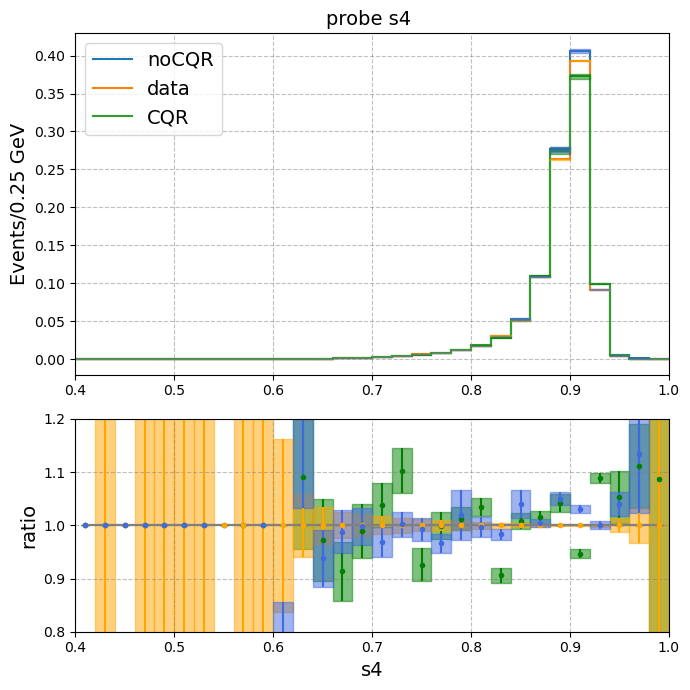

In [25]:
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=3, colspan=3)

var = "probe_s4"
min_ = 0.4
max_ = 1.
nbins = 30

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(
    [
        "CQR", 
        "data",
        "noCQR",
        
    ], 
    name="c"
)
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

for sample in [*fileset]:
    full_hist.fill(ax = fileset[sample][var], weight = fileset[sample]["weight_norm"], c=sample)
    full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["weight_norm"]**2, c=sample)

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# cosmetics
ax0.set_ylabel('Events/0.25 GeV', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (3, 0), rowspan=2, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

colours = ["green", "orange", "royalblue"]
for j, sample in enumerate([*fileset]):
    print(sample,colours[j])
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

for j, sample in enumerate([*fileset]):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["data"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="data")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["data"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["data"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["data"][i], ydn[sample][i]/mc["bins"]["data"][i]], [yup[sample][i]/mc["bins"]["data"][i], yup[sample][i]/mc["bins"]["data"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="data stat unc.")


ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('s4', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()

plt.savefig(f"plots/CQR_{var}.pdf")

CQR green
data orange
noCQR royalblue


/tmp/ipykernel_49145/135503485.py:83: RuntimeWarning: divide by zero encountered in divide
  mc["bins"][sample] / mc["bins"]["data"],
/tmp/ipykernel_49145/135503485.py:83: RuntimeWarning: invalid value encountered in divide
  mc["bins"][sample] / mc["bins"]["data"],
/tmp/ipykernel_49145/135503485.py:87: RuntimeWarning: divide by zero encountered in divide
  ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["data"]), color=colours[j], marker=".", linestyle="", label=sample)
/tmp/ipykernel_49145/135503485.py:87: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["data"]), color=colours[j], marker=".", linestyle="", label=sample)
/work/bevila_t/MINICONDA3/envs/dev-higgs-dna/lib/python3.10/site-packages/matplotlib/axes/_axes.py:3680: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.vstack([-(1 - lolims), 1 - uplims]) * err
/tmp/ipykernel_4914

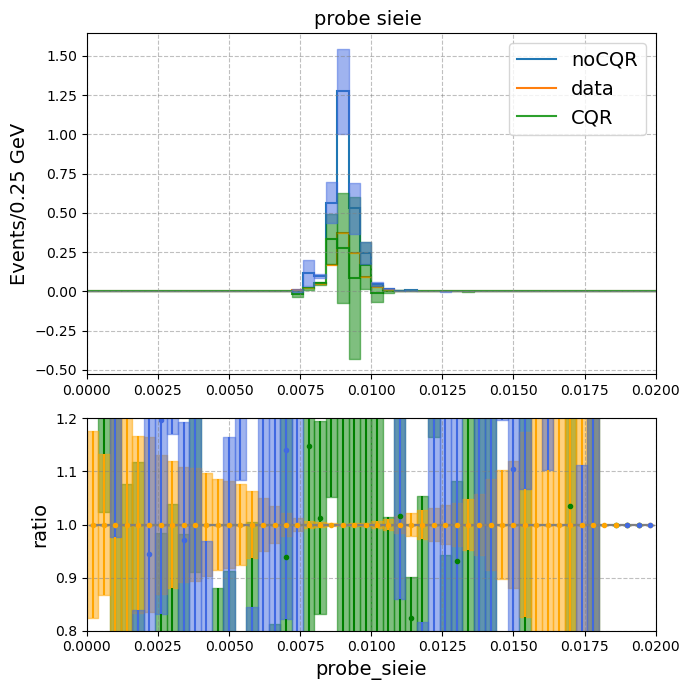

In [108]:
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=3, colspan=3)

var = "probe_sieie"
min_ = 0
max_ = 0.02
nbins = 50

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(
    [
        "CQR", 
        "data",
        "noCQR",
        
    ], 
    name="c"
)
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

for sample in [*fileset]:
    full_hist.fill(ax = fileset[sample][var], weight = fileset[sample]["weight_norm"], c=sample)
    full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["weight_norm"]**2, c=sample)

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# cosmetics
ax0.set_ylabel('Events/0.25 GeV', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (3, 0), rowspan=2, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

colours = ["green", "orange", "royalblue"]
for j, sample in enumerate([*fileset]):
    print(sample,colours[j])
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

for j, sample in enumerate([*fileset]):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["data"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="data")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["data"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["data"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["data"][i], ydn[sample][i]/mc["bins"]["data"][i]], [yup[sample][i]/mc["bins"]["data"][i], yup[sample][i]/mc["bins"]["data"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="data stat unc.")


ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel(f'{var}', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()

plt.savefig(f"plots/CQR_{var}.pdf")

CQR green
data orange
noCQR royalblue


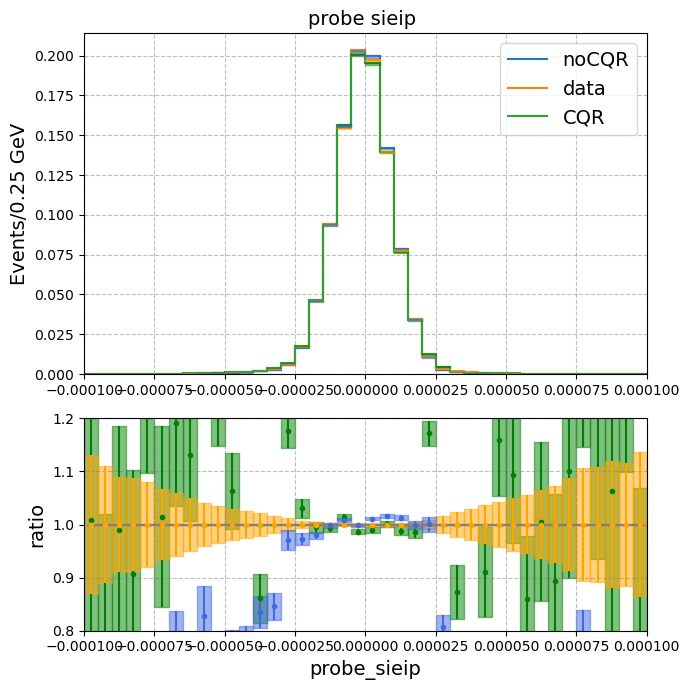

In [47]:
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=3, colspan=3)

var = "probe_sieip"
min_ = -0.0001
max_ = 0.0001
nbins = 40

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(
    [
        "CQR", 
        "data",
        "noCQR",
        
    ], 
    name="c"
)
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

for sample in [*fileset]:
    full_hist.fill(ax = fileset[sample][var], weight = fileset[sample]["weight_norm"], c=sample)
    full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["weight_norm"]**2, c=sample)

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# cosmetics
ax0.set_ylabel('Events/0.25 GeV', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (3, 0), rowspan=2, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

colours = ["green", "orange", "royalblue"]
for j, sample in enumerate([*fileset]):
    print(sample,colours[j])
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

for j, sample in enumerate([*fileset]):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["data"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="data")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["data"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["data"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["data"][i], ydn[sample][i]/mc["bins"]["data"][i]], [yup[sample][i]/mc["bins"]["data"][i], yup[sample][i]/mc["bins"]["data"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="data stat unc.")


ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel(f'{var}', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()

plt.savefig(f"plots/CQR_{var}.pdf")

CQR green
data orange
noCQR royalblue


/tmp/ipykernel_49145/779384161.py:83: RuntimeWarning: invalid value encountered in divide
  mc["bins"][sample] / mc["bins"]["data"],
/tmp/ipykernel_49145/779384161.py:87: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["data"]), color=colours[j], marker=".", linestyle="", label=sample)
/tmp/ipykernel_49145/779384161.py:90: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["data"][i], ydn[sample][i]/mc["bins"]["data"][i]], [yup[sample][i]/mc["bins"]["data"][i], yup[sample][i]/mc["bins"]["data"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="data stat unc.")


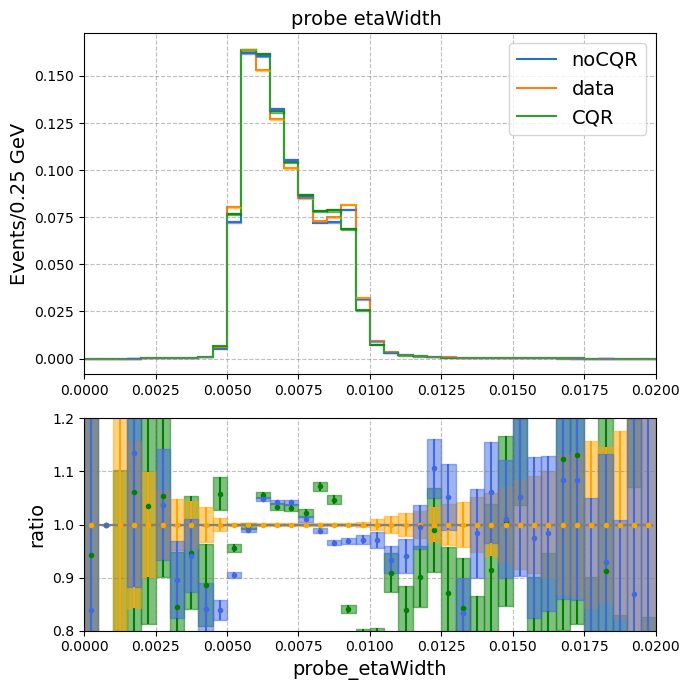

In [49]:
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=3, colspan=3)

var = "probe_etaWidth"
min_ = 0.
max_ = 0.02
nbins = 40

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(
    [
        "CQR", 
        "data",
        "noCQR",
        
    ], 
    name="c"
)
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

for sample in [*fileset]:
    full_hist.fill(ax = fileset[sample][var], weight = fileset[sample]["weight_norm"], c=sample)
    full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["weight_norm"]**2, c=sample)

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# cosmetics
ax0.set_ylabel('Events/0.25 GeV', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (3, 0), rowspan=2, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

colours = ["green", "orange", "royalblue"]
for j, sample in enumerate([*fileset]):
    print(sample,colours[j])
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

for j, sample in enumerate([*fileset]):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["data"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="data")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["data"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["data"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["data"][i], ydn[sample][i]/mc["bins"]["data"][i]], [yup[sample][i]/mc["bins"]["data"][i], yup[sample][i]/mc["bins"]["data"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="data stat unc.")


ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel(f'{var}', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()

plt.savefig(f"plots/CQR_{var}.pdf")

CQR green
data orange
noCQR royalblue


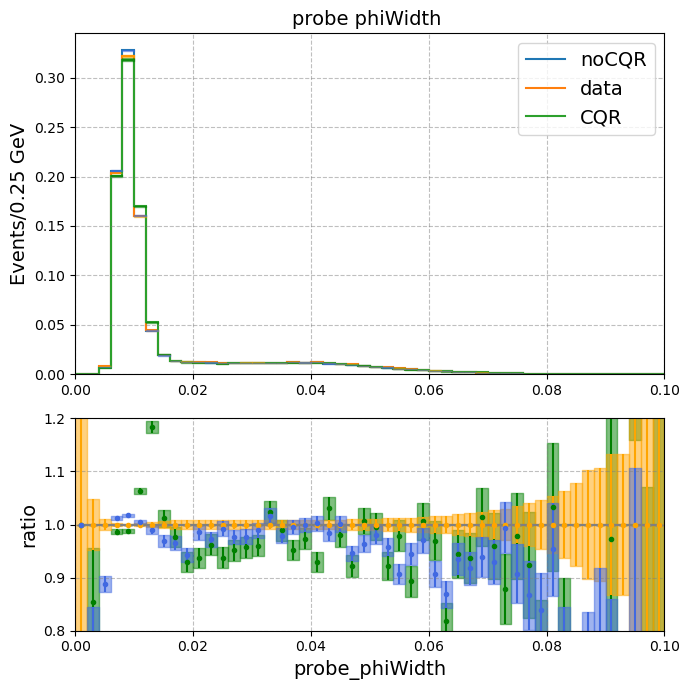

In [50]:
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=3, colspan=3)

var = "probe_phiWidth"
min_ = 0.
max_ = 0.1
nbins = 50

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(
    [
        "CQR", 
        "data",
        "noCQR",
        
    ], 
    name="c"
)
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

for sample in [*fileset]:
    full_hist.fill(ax = fileset[sample][var], weight = fileset[sample]["weight_norm"], c=sample)
    full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["weight_norm"]**2, c=sample)

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# cosmetics
ax0.set_ylabel('Events/0.25 GeV', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (3, 0), rowspan=2, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

colours = ["green", "orange", "royalblue"]
for j, sample in enumerate([*fileset]):
    print(sample,colours[j])
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

for j, sample in enumerate([*fileset]):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["data"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="data")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["data"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["data"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["data"][i], ydn[sample][i]/mc["bins"]["data"][i]], [yup[sample][i]/mc["bins"]["data"][i], yup[sample][i]/mc["bins"]["data"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="data stat unc.")


ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel(f'{var}', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()

plt.savefig(f"plots/CQR_{var}.pdf")

CQR green
data orange
noCQR royalblue


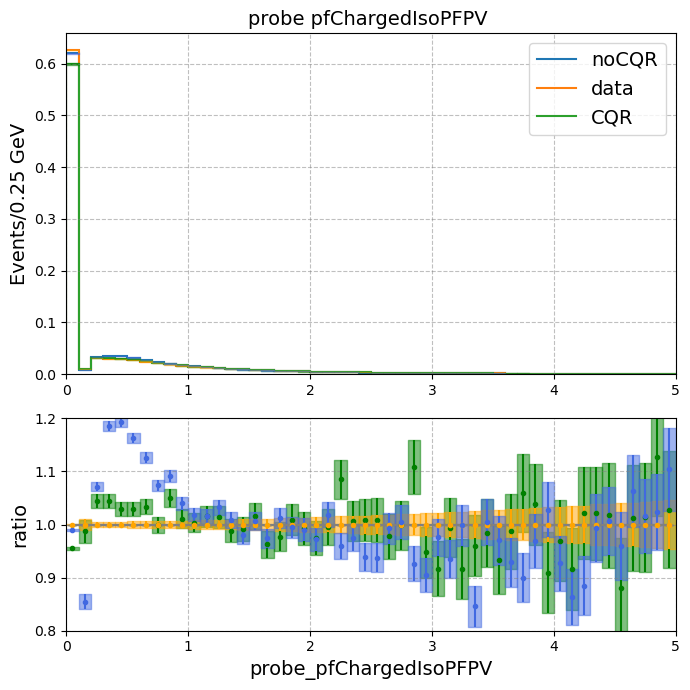

In [51]:
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=3, colspan=3)

var = "probe_pfChargedIsoPFPV"
min_ = 0.
max_ = 5
nbins = 50

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(
    [
        "CQR", 
        "data",
        "noCQR",
        
    ], 
    name="c"
)
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

for sample in [*fileset]:
    full_hist.fill(ax = fileset[sample][var], weight = fileset[sample]["weight_norm"], c=sample)
    full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["weight_norm"]**2, c=sample)

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# cosmetics
ax0.set_ylabel('Events/0.25 GeV', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (3, 0), rowspan=2, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

colours = ["green", "orange", "royalblue"]
for j, sample in enumerate([*fileset]):
    print(sample,colours[j])
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

for j, sample in enumerate([*fileset]):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["data"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="data")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["data"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["data"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["data"][i], ydn[sample][i]/mc["bins"]["data"][i]], [yup[sample][i]/mc["bins"]["data"][i], yup[sample][i]/mc["bins"]["data"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="data stat unc.")


ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel(f'{var}', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()

plt.savefig(f"plots/CQR_{var}.pdf")

CQR green
data orange
noCQR royalblue


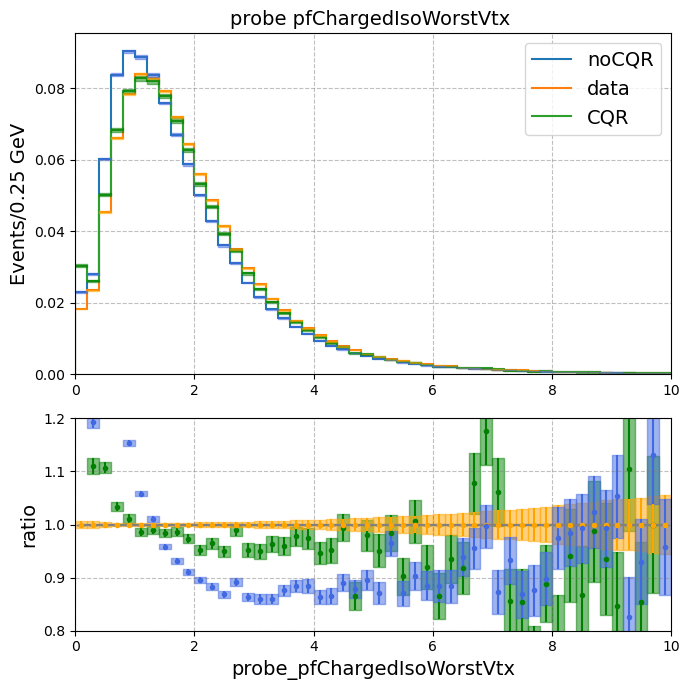

In [52]:
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=3, colspan=3)

var = "probe_pfChargedIsoWorstVtx"
min_ = 0.
max_ = 10
nbins = 50

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(
    [
        "CQR", 
        "data",
        "noCQR",
        
    ], 
    name="c"
)
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

for sample in [*fileset]:
    full_hist.fill(ax = fileset[sample][var], weight = fileset[sample]["weight_norm"], c=sample)
    full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["weight_norm"]**2, c=sample)

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# cosmetics
ax0.set_ylabel('Events/0.25 GeV', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (3, 0), rowspan=2, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

colours = ["green", "orange", "royalblue"]
for j, sample in enumerate([*fileset]):
    print(sample,colours[j])
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

for j, sample in enumerate([*fileset]):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["data"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="data")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["data"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["data"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["data"][i], ydn[sample][i]/mc["bins"]["data"][i]], [yup[sample][i]/mc["bins"]["data"][i], yup[sample][i]/mc["bins"]["data"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="data stat unc.")


ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel(f'{var}', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()

plt.savefig(f"plots/CQR_{var}.pdf")

CQR green
data orange
noCQR royalblue


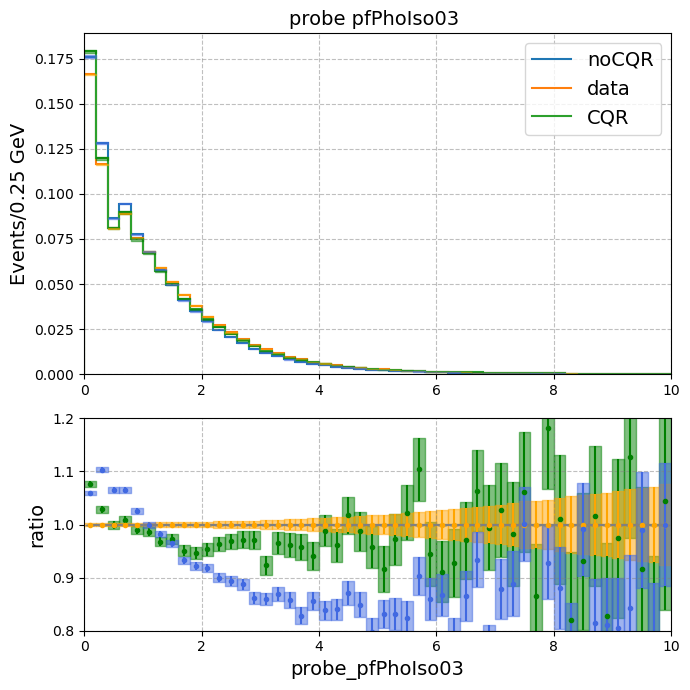

In [53]:
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=3, colspan=3)

var = "probe_pfPhoIso03"
min_ = 0.
max_ = 10
nbins = 50

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(
    [
        "CQR", 
        "data",
        "noCQR",
        
    ], 
    name="c"
)
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

for sample in [*fileset]:
    full_hist.fill(ax = fileset[sample][var], weight = fileset[sample]["weight_norm"], c=sample)
    full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["weight_norm"]**2, c=sample)

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# cosmetics
ax0.set_ylabel('Events/0.25 GeV', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (3, 0), rowspan=2, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

colours = ["green", "orange", "royalblue"]
for j, sample in enumerate([*fileset]):
    print(sample,colours[j])
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

for j, sample in enumerate([*fileset]):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["data"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="data")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["data"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["data"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["data"][i], ydn[sample][i]/mc["bins"]["data"][i]], [yup[sample][i]/mc["bins"]["data"][i], yup[sample][i]/mc["bins"]["data"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="data stat unc.")


ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel(f'{var}', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()

plt.savefig(f"plots/CQR_{var}.pdf")

CQR green
data orange
noCQR royalblue


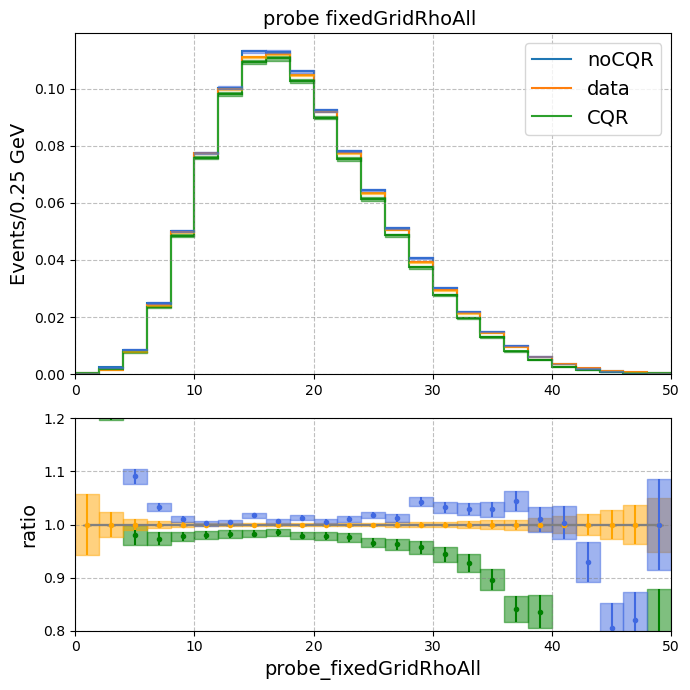

In [62]:
# Xsec variations
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=3, colspan=3)

var = "probe_fixedGridRhoAll"
min_ = 0.
max_ = 50
nbins = 25

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(
    [
        "CQR", 
        "data",
        "noCQR",
        
    ], 
    name="c"
)
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

for sample in [*fileset]:
    full_hist.fill(ax = fileset[sample][var], weight = fileset[sample]["weight_norm"], c=sample)
    full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["weight_norm"]**2, c=sample)

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# cosmetics
ax0.set_ylabel('Events/0.25 GeV', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (3, 0), rowspan=2, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

colours = ["green", "orange", "royalblue"]
for j, sample in enumerate([*fileset]):
    print(sample,colours[j])
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

for j, sample in enumerate([*fileset]):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["data"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="data")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["data"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["data"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["data"][i], ydn[sample][i]/mc["bins"]["data"][i]], [yup[sample][i]/mc["bins"]["data"][i], yup[sample][i]/mc["bins"]["data"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="data stat unc.")


ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel(f'{var}', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()

plt.savefig(f"plots/CQR_{var}.pdf")

CQR green
data orange
noCQR royalblue


/tmp/ipykernel_15265/4286923229.py:84: RuntimeWarning: invalid value encountered in divide
  mc["bins"][sample] / mc["bins"]["data"],
/tmp/ipykernel_15265/4286923229.py:88: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["data"]), color=colours[j], marker=".", linestyle="", label=sample)
/tmp/ipykernel_15265/4286923229.py:91: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["data"][i], ydn[sample][i]/mc["bins"]["data"][i]], [yup[sample][i]/mc["bins"]["data"][i], yup[sample][i]/mc["bins"]["data"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="data stat unc.")


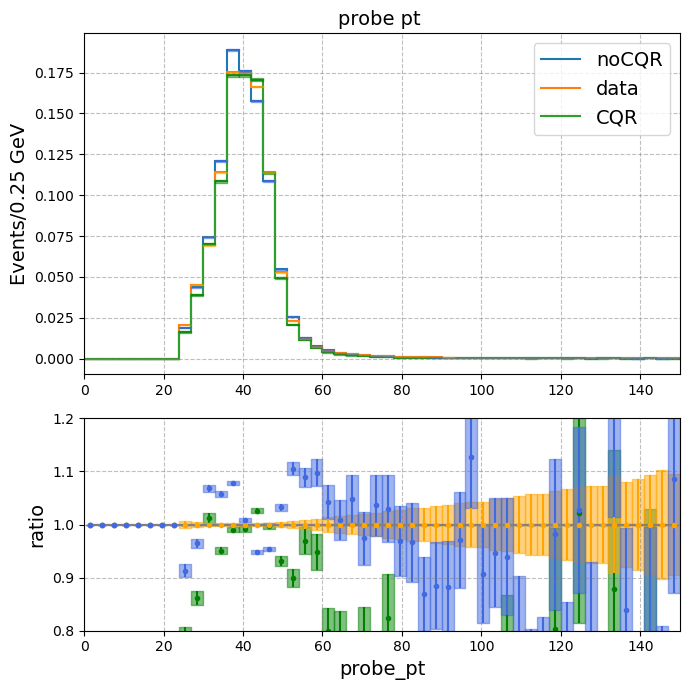

In [63]:
# Xsec variations
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=3, colspan=3)

var = "probe_pt"
min_ = 0.
max_ = 150
nbins = 50

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(
    [
        "CQR", 
        "data",
        "noCQR",
        
    ], 
    name="c"
)
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

for sample in [*fileset]:
    full_hist.fill(ax = fileset[sample][var], weight = fileset[sample]["weight_norm"], c=sample)
    full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["weight_norm"]**2, c=sample)

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# cosmetics
ax0.set_ylabel('Events/0.25 GeV', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (3, 0), rowspan=2, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

colours = ["green", "orange", "royalblue"]
for j, sample in enumerate([*fileset]):
    print(sample,colours[j])
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

for j, sample in enumerate([*fileset]):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["data"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="data")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["data"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["data"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["data"][i], ydn[sample][i]/mc["bins"]["data"][i]], [yup[sample][i]/mc["bins"]["data"][i], yup[sample][i]/mc["bins"]["data"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="data stat unc.")


ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel(f'{var}', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()

plt.savefig(f"plots/CQR_{var}.pdf")

CQR green
data orange
noCQR royalblue


/tmp/ipykernel_15265/3373279426.py:84: RuntimeWarning: invalid value encountered in divide
  mc["bins"][sample] / mc["bins"]["data"],
/tmp/ipykernel_15265/3373279426.py:88: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["data"]), color=colours[j], marker=".", linestyle="", label=sample)
/tmp/ipykernel_15265/3373279426.py:91: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["data"][i], ydn[sample][i]/mc["bins"]["data"][i]], [yup[sample][i]/mc["bins"]["data"][i], yup[sample][i]/mc["bins"]["data"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="data stat unc.")


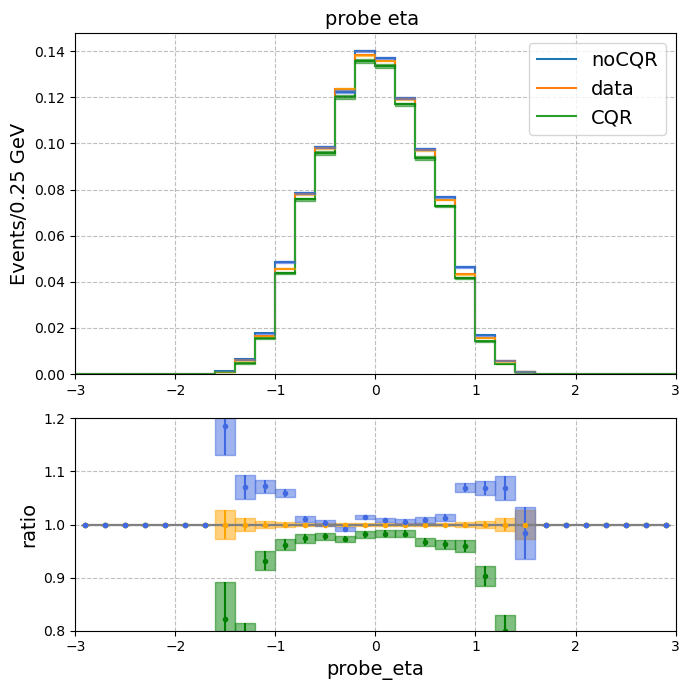

In [64]:
# Xsec variations
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=3, colspan=3)

var = "probe_eta"
min_ = -3.
max_ = 3
nbins = 30

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(
    [
        "CQR", 
        "data",
        "noCQR",
        
    ], 
    name="c"
)
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

for sample in [*fileset]:
    full_hist.fill(ax = fileset[sample][var], weight = fileset[sample]["weight_norm"], c=sample)
    full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["weight_norm"]**2, c=sample)

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# cosmetics
ax0.set_ylabel('Events/0.25 GeV', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (3, 0), rowspan=2, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

colours = ["green", "orange", "royalblue"]
for j, sample in enumerate([*fileset]):
    print(sample,colours[j])
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

for j, sample in enumerate([*fileset]):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["data"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="data")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["data"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["data"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["data"][i], ydn[sample][i]/mc["bins"]["data"][i]], [yup[sample][i]/mc["bins"]["data"][i], yup[sample][i]/mc["bins"]["data"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="data stat unc.")


ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel(f'{var}', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()

plt.savefig(f"plots/CQR_{var}.pdf")

CQR green
data orange
noCQR royalblue


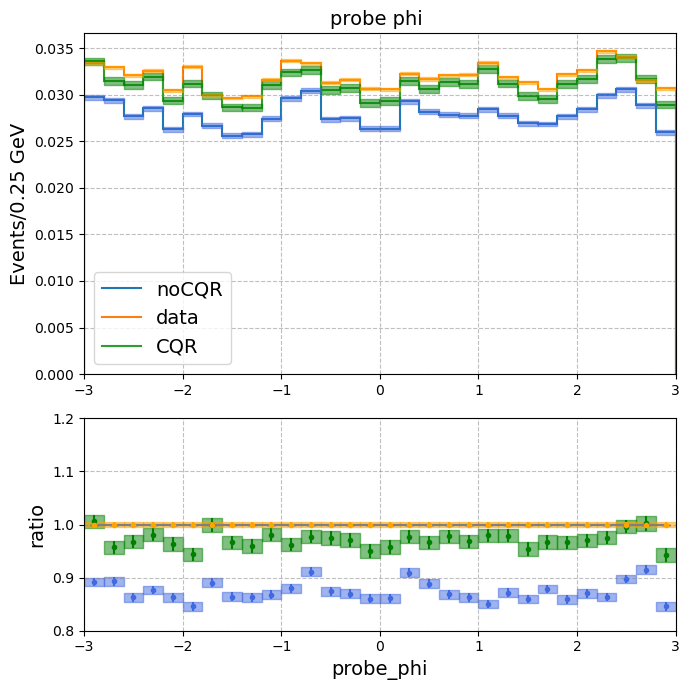

In [65]:
# Xsec variations
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=3, colspan=3)

var = "probe_phi"
min_ = -3.
max_ = 3
nbins = 30

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(
    [
        "CQR", 
        "data",
        "noCQR",
        
    ], 
    name="c"
)
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

for sample in [*fileset]:
    full_hist.fill(ax = fileset[sample][var], weight = fileset[sample]["weight_norm"], c=sample)
    full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["weight_norm"]**2, c=sample)

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# cosmetics
ax0.set_ylabel('Events/0.25 GeV', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (3, 0), rowspan=2, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

colours = ["green", "orange", "royalblue"]
for j, sample in enumerate([*fileset]):
    print(sample,colours[j])
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

for j, sample in enumerate([*fileset]):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["data"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="data")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["data"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["data"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["data"][i], ydn[sample][i]/mc["bins"]["data"][i]], [yup[sample][i]/mc["bins"]["data"][i], yup[sample][i]/mc["bins"]["data"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="data stat unc.")


ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel(f'{var}', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()

plt.savefig(f"plots/CQR_{var}.pdf")

CQR green
data orange
noCQR royalblue


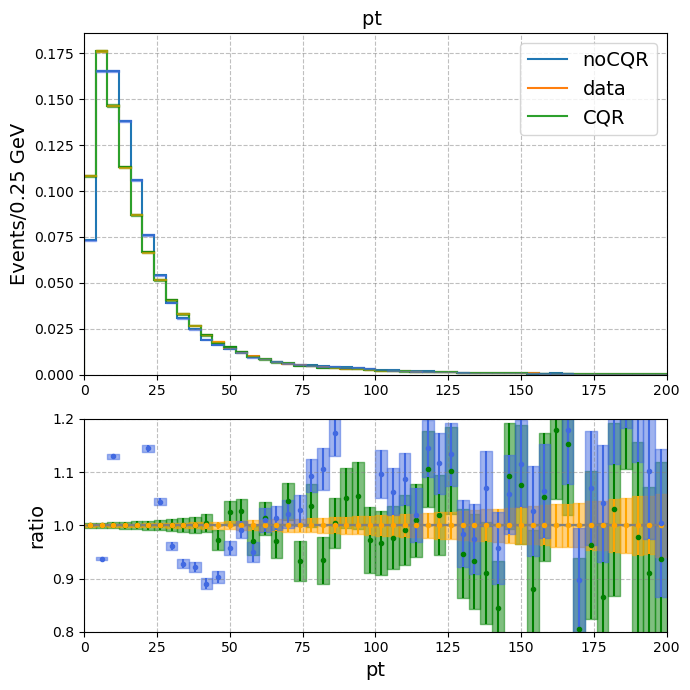

In [91]:
# Xsec variations
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=3, colspan=3)

var = "pt"
min_ = 0.
max_ = 200
nbins = 50

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(
    [
        "CQR", 
        "data",
        "noCQR",
        
    ], 
    name="c"
)
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

title = ""
for x in var.split("_"):
    title += f"{x} "

for sample in [*fileset]:
    full_hist.fill(ax = fileset[sample][var], weight = fileset[sample]["weight_norm"], c=sample)
    full_hist_err.fill(ax = fileset[sample][var], weight = fileset[sample]["weight_norm"]**2, c=sample)

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]

# cosmetics
ax0.set_ylabel('Events/0.25 GeV', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (3, 0), rowspan=2, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

colours = ["green", "orange", "royalblue"]
for j, sample in enumerate([*fileset]):
    print(sample,colours[j])
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")

for j, sample in enumerate([*fileset]):
    ratio = ak.where(
        mc["bins"][sample] != 0,
        mc["bins"][sample] / mc["bins"]["data"],
        ak.ones_like(mc["bins"][sample])
    )
    ax1.plot(mc["edges"][sample][:-1], ak.ones_like(mc["bins"][sample]), color="grey", marker="_", linestyle="-", label="data")
    ax1.errorbar(mc["edges"][sample][:-1], ratio, yerr = abs(mc["errs"][sample]/mc["bins"]["data"]), color=colours[j], marker=".", linestyle="", label=sample)

    for i, x in enumerate(mc["edges"]["data"][:-1]):
        ax1.fill_between([x - half_bin, x + half_bin], [ydn[sample][i]/mc["bins"]["data"][i], ydn[sample][i]/mc["bins"]["data"][i]], [yup[sample][i]/mc["bins"]["data"][i], yup[sample][i]/mc["bins"]["data"][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="data stat unc.")


ax1.set_ylim([0.8,1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel(f'{var}', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()

plt.savefig(f"plots/CQR_{var}.pdf")